In [21]:
import pandas as pd
# from econtools.metrics import reg
import matplotlib.pyplot as plt
import numpy as np

Data creation

In [24]:
var_year = pd.read_csv("../data/output_data/Full_Trial_Data.csv",usecols=["variety_id","first_year","GE"]).drop_duplicates()
var_year.to_csv("../data/output_data/Var_Years.csv",index=False)

d2 = pd.read_csv("../data/output_data/MG2_Data.csv")
d3 = pd.read_csv("../data/output_data/MG3_Data.csv")

d3_w = d3[d3['variety_id'] == "public_variety-WILLIAMS_82"]
d2_d = d2[d2['variety_id'] == "public_variety-DWIGHT"]
d2_j = d2[d2['variety_id'] == "public_variety-JACK"]

d3ix_complete = pd.read_csv("./MG3_ix_complete.csv").iloc[:,1:]
d2ix_complete = pd.read_csv("./MG2_ix_complete.csv").iloc[:,1:]
d3ix_reg3 = pd.read_csv("./MG3_ix_reg3.csv").iloc[:,1:]
d2ix_reg23 = pd.read_csv("./MG2_ix_reg23.csv").iloc[:,1:]

d2_complete = pd.concat([d2.merge(d2ix_complete).drop_duplicates(),
                         d2_d,d2_j],axis=0)

d2_complete = d2_complete.merge(d2_d[['region','location','year','yield_kg','height','lodging_comb','maturity_week']],
                                on=["region","location","year"],
                                suffixes = ["","_d"])\
                         .merge(d2_j[['region','location','year','yield_kg','height','lodging_comb','maturity_week']],
                                on=["region","location","year"],
                                suffixes = ["","_j"])

d3_complete = pd.concat([d3.merge(d3ix_complete).drop_duplicates(),
                         d3_w],axis=0)

d3_complete = d3_complete.merge(d3_w[['region','location','year','yield_kg','height','lodging_comb','maturity_week']],
                                on=["region","location","year"],
                                suffixes = ["","_w"])

d2_reg23 = \
pd.concat([d2.merge(d2ix_reg23).drop_duplicates(),
           d2_d[(d2_d["region"]=="region2")|(d2_d['region']=="region3")],
           d2_j[(d2_j["region"]=="region2")|(d2_j['region']=="region3")]],axis=0)

d2_reg23 = d2_reg23.merge(d2_d[['region','location','year','yield_kg','height','lodging_comb','maturity_week']],
                                on=["region","location","year"],
                                suffixes = ["","_d"])\
                   .merge(d2_j[['region','location','year','yield_kg','height','lodging_comb','maturity_week']],
                                on=["region","location","year"],
                                suffixes = ["","_j"])

d3_reg3 = pd.concat([d3.merge(d3ix_reg3).drop_duplicates(),
                     d3_w[d3_w.region=="region3"]],axis=0)\
                    .merge(d3_w[['region','location','year','yield_kg','height','lodging_comb','maturity_week']],
                                on=["region","location","year"],
                                suffixes = ["","_w"])

C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_18372\1940017600.py:1: DtypeWarning: Columns (106) have mixed types. Specify dtype option on import or set low_memory=False.
  var_year = pd.read_csv("../data/output_data/Full_Trial_Data.csv",usecols=["variety_id","first_year","GE"]).drop_duplicates()
C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_18372\1940017600.py:4: DtypeWarning: Columns (13,24,102,104,106,126) have mixed types. Specify dtype option on import or set low_memory=False.
  d2 = pd.read_csv("../data/output_data/MG2_Data.csv")
C:\Users\jhtchns2\AppData\Local\Temp\ipykernel_18372\1940017600.py:5: DtypeWarning: Columns (5,13,24,102,104,106,126) have mixed types. Specify dtype option on import or set low_memory=False.
  d3 = pd.read_csv("../data/output_data/MG3_Data.csv")


In [26]:
d2_complete.to_csv("../data/output_data/MG2_Complete_FE.csv",index=False)
d3_complete.to_csv("../data/output_data/MG3_Complete_FE.csv",index=False)
d2_reg23.to_csv("../data/output_data/MG2_Reg23_FE.csv",index=False)
d3_reg3.to_csv("../data/output_data/MG3_Reg3_FE.csv",index=False)

Time trend calculation

In [4]:
dfd = pd.read_csv("./dwight_fe.csv")
dfj = pd.read_csv("./jack_fe.csv")
dfw = pd.read_csv("./williams_fe.csv")

dfd = dfd.iloc[:-29]
dfd.columns = ['variety_id',"est","se","t","p"]
dfd['est_cor'] = dfd['est']
dfd.loc[dfd['p']>=.1,"est_cor"] = 0 
dfd['variety_id'] = dfd['variety_id'].apply(lambda x: x.split("public_variety-DWIGHT")[1][2:])
dfd = dfd.merge(var_year,how='left')

dfj = dfj.iloc[:-29]
dfj.columns = ['variety_id',"est","se","t","p"]
dfj['est_cor'] = dfj['est']
dfj.loc[dfj['p']>=.1,"est_cor"] = 0 
dfj['variety_id'] = dfj['variety_id'].apply(lambda x: x.split("public_variety-JACK")[1][2:])
dfj = dfj.merge(var_year,how='left')

dfw = dfw.iloc[:-29]
dfw.columns = ['variety_id',"est","se","t","p"]
dfw['est_cor'] = dfw['est']
dfw.loc[dfw['p']>=.1,"est_cor"] = 0 
dfw['variety_id'] = dfw['variety_id'].apply(lambda x: x.split("public_variety-WILLIAMS_82")[1][2:])
dfw = dfw.merge(var_year,how='left')

In [15]:
nullcount = dfd.groupby(["first_year"])['est'].count()/dfd.groupby(["first_year"])['variety_id'].count()

In [21]:
dfd['est'].count()/dfd['first_year'].count()

0.9268727705112961

In [25]:
wvals = dfw[['est','first_year']].dropna()

In [26]:
wvals["1"] = 1

In [30]:
y = wvals[['est']].values

In [33]:
X = wvals[['1','first_year']].values

In [43]:
coefs = np.linalg.inv(X.T@X)@X.T@y

In [45]:
linfit = lambda x: coefs[0] + coefs[1]*x

In [54]:
Y = [linfit(x)[0] for x in range(1995,2021) ]

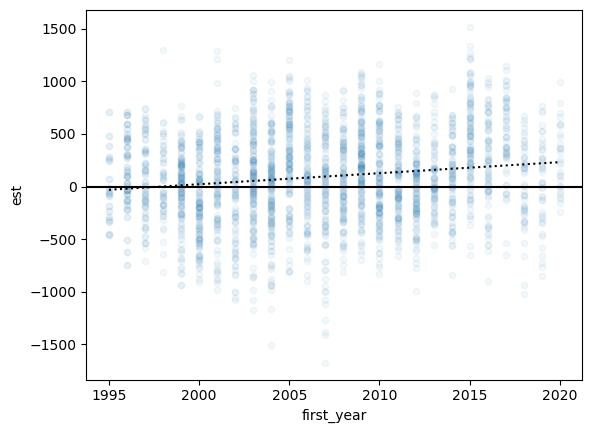

In [59]:
dfw.plot(kind="scatter",x="first_year",y="est",alpha=.05)
plt.plot(range(1995,2021),Y,color="black",ls=":")
plt.axhline(0,color="black")